# Census Income Project

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In the above column dataset consist of 32560 rows and 15 columns.

Out of which income column is the target variable.

In target column it has two classes,so we have to perform classification method to check the target performance

In [105]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


This method shows the top 5 columns of the dataset

In [106]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K



This method shows the bottom 5 columns of the dataset

In [107]:
# Checking the dimension of dataset 
df.shape

(32560, 15)

The above dataset contains the 32560 rows and 15 columns.
The above dataset contains the both catergorical and numerical colunns.
In the dataset 14 rows were independent and 1 row is our target variable

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This method shows the good overview of the dataset.
The dataset contains 32560 rows and 15 columns.
In the dataset there is no null values present.
The dataset consist of object and integer datatype
The total memory usage of the dataset is 3.7+ MB

In [109]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The above dataset contains the integer and oject datatype columns.
The dtype of the dataset is object

In [110]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

This method shows the number of unique values in each column of the dataset
The highest number of unique value present in the Fnlwgt column

In [111]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In the above dataset there is no null values present 

<AxesSubplot:>

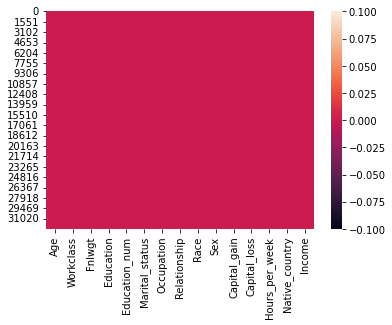

In [112]:
sns.heatmap(df.isnull())

In the above heatmap there is no null values present , as our heatmap is clean with same colour all over the map

In [113]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In our target column there is two unique value present 

In [114]:
df["Income"].nunique()

2

In [115]:
for i in df.columns:
        print(df[i].value_counts())
        print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In the above column checking the value counts of each columns 

In [116]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In th above method it shows the name of different columns

In [117]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

Converting the columns into the list format 

In [118]:
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

dropping the columns  have more number of zeros

In the above dataset the columns having "?" are categorical.
We will fill "?" values with most frequently occuring values of the respective columns.


In [119]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [120]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [121]:
df["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [122]:
df["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [123]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Government-Sector')


In [124]:
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],'Private-sector')

In [125]:
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [126]:
df["Workclass"].value_counts()

Private-sector        28189
 Government-Sector     4350
Not-working              21
Name: Workclass, dtype: int64

In [127]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [128]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')


In [129]:
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')


In [130]:
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')


In [131]:
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')


In [132]:
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [133]:
df['Education'].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [134]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [135]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [136]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In the above dataset we have replaced the different types classes in the columns Workclass, Education, Marital_status.

In [137]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Private-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [138]:
category_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_column.append(i)
print(category_column)
        

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In the above dataset these are the categorical columns present.

In [139]:
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_column.append(i)
print(numerical_column)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


In the above dataset these are the numerical columns present.

In [140]:
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


In the above dataset there is no spaces present

In [141]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


It shows the statistical summary of dataset.

The summary of this dataset looks perfect since there is no negative/ invalid values present.

The counts of all the columns are same.

In the dataset there is no missing values.

In the above data the mean is grater than the median(50%) which means they are skewed to right.

There is a huge difference between 75% and max which means the outliers are present in the columns.

In the data we observe that the minimum age is 17 years to maximum age 90 years.



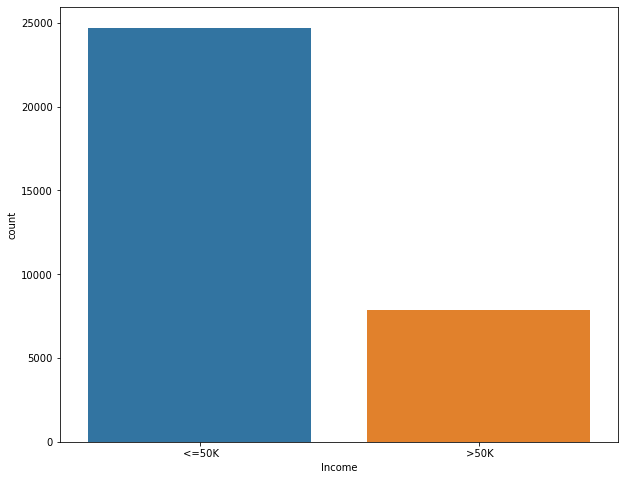

In [142]:
plt.figure(figsize=(10,8))
sns.countplot(df["Income"])
plt.show()

Most of the people have the income less than or equal to 50K. 

In the plot it shows the huge difference due to which class is imbalance.


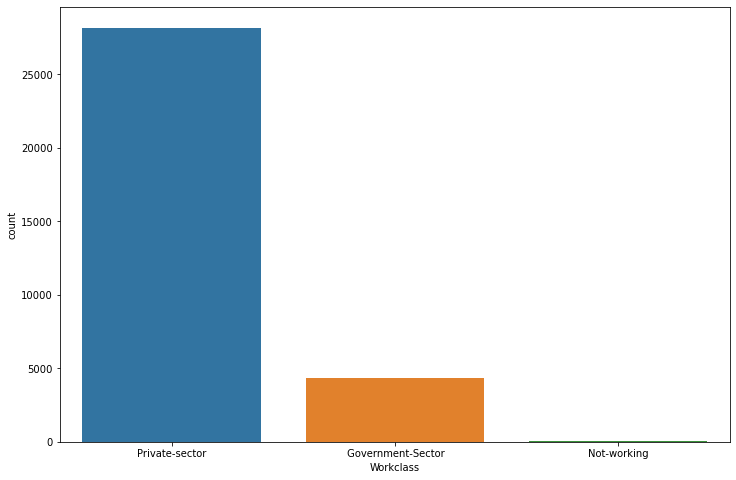

In [143]:
plt.figure(figsize=(12,8))
sns.countplot(df["Workclass"])
plt.show()

In the above plot most of the people is working in private sector.

The count of the private sector is high as compared to government sector. 

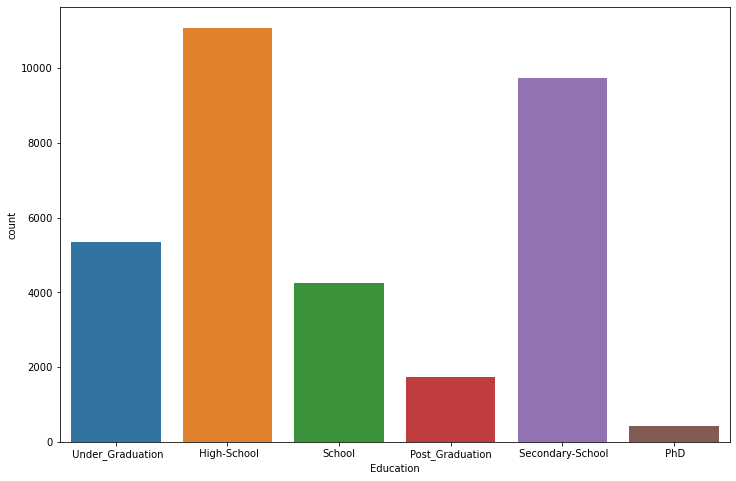

In [144]:
plt.figure(figsize=(12,8))
sns.countplot(df["Education"])
plt.show()

The count of High-School is high as compared to other educational stream

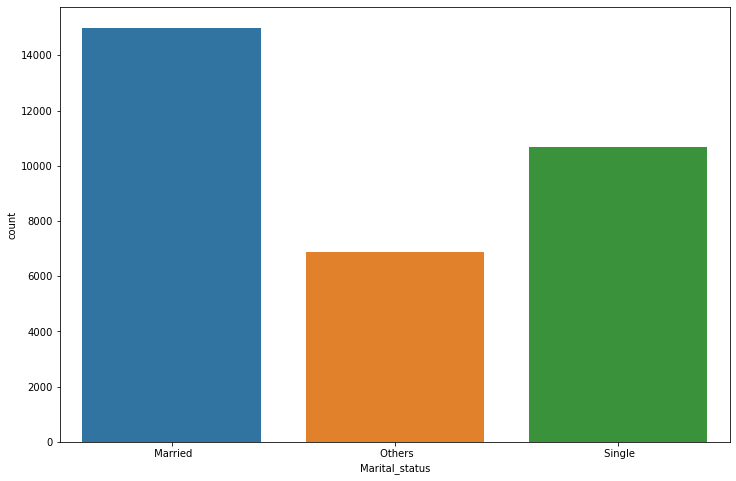

In [145]:
plt.figure(figsize=(12,8))
sns.countplot(df["Marital_status"])
plt.show()

The people who got married have high counts as compared to Singles or never married people.

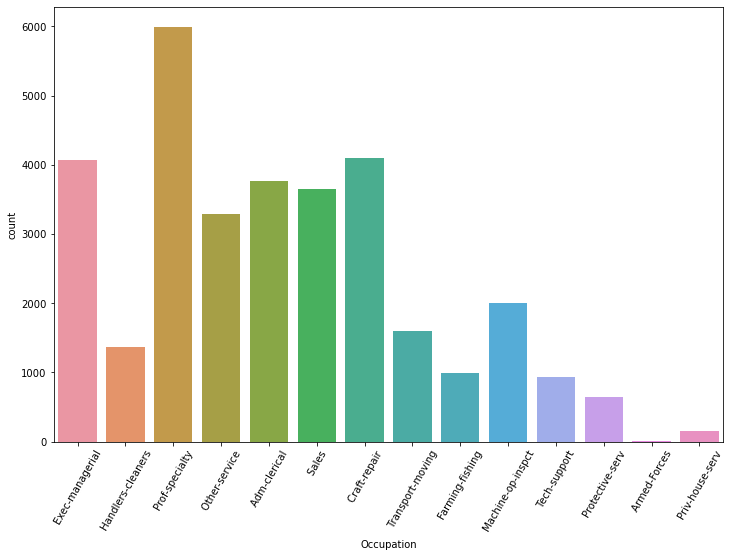

In [146]:
plt.figure(figsize=(12,8))
sns.countplot(df["Occupation"])
plt.xticks(rotation=60)
plt.show()

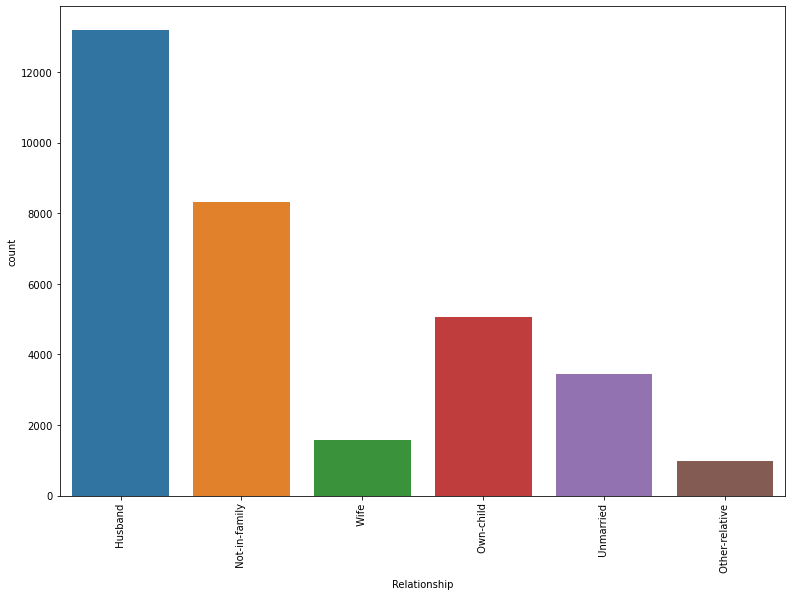

In [147]:
plt.figure(figsize=(13,9))
sns.countplot(df["Relationship"])
plt.xticks(rotation=90)
plt.show()

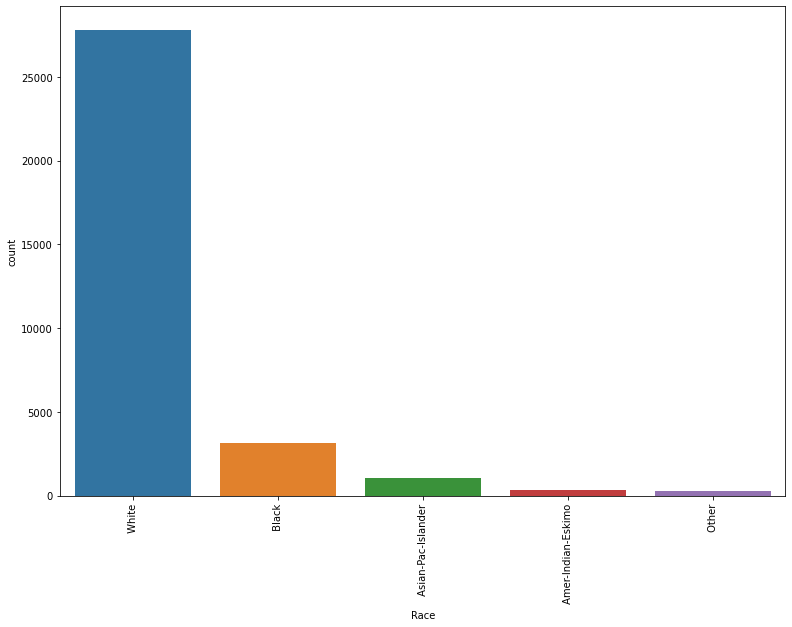

In [148]:
plt.figure(figsize=(13,9))
sns.countplot(df["Race"])
plt.xticks(rotation=90)
plt.show()

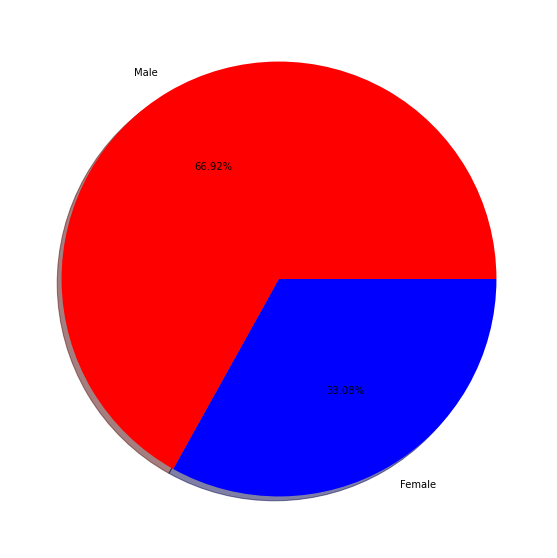

In [149]:
labels='Male','Female'
fig, ax = plt.subplots(figsize=(12,10))
colors = ["red","blue"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()


The count of Male is high and has around 66% and only 33% of females are there.

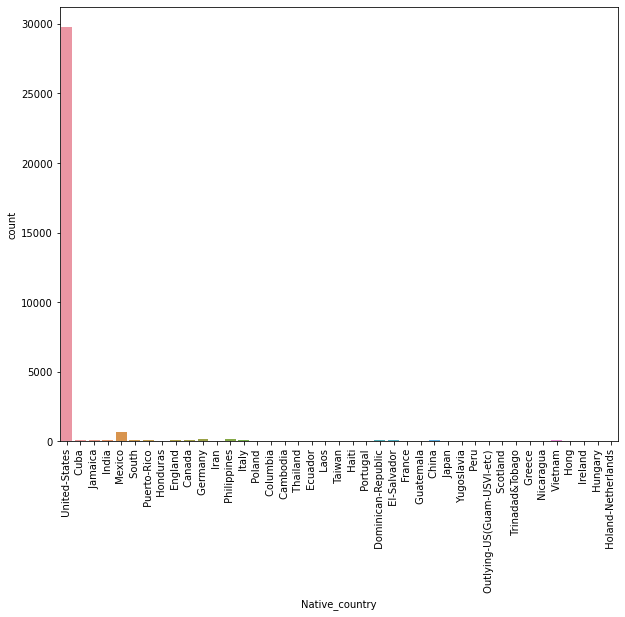

In [150]:
plt.figure(figsize=(10,8))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()


The United States country has highest count as compared to mexico and other countries.


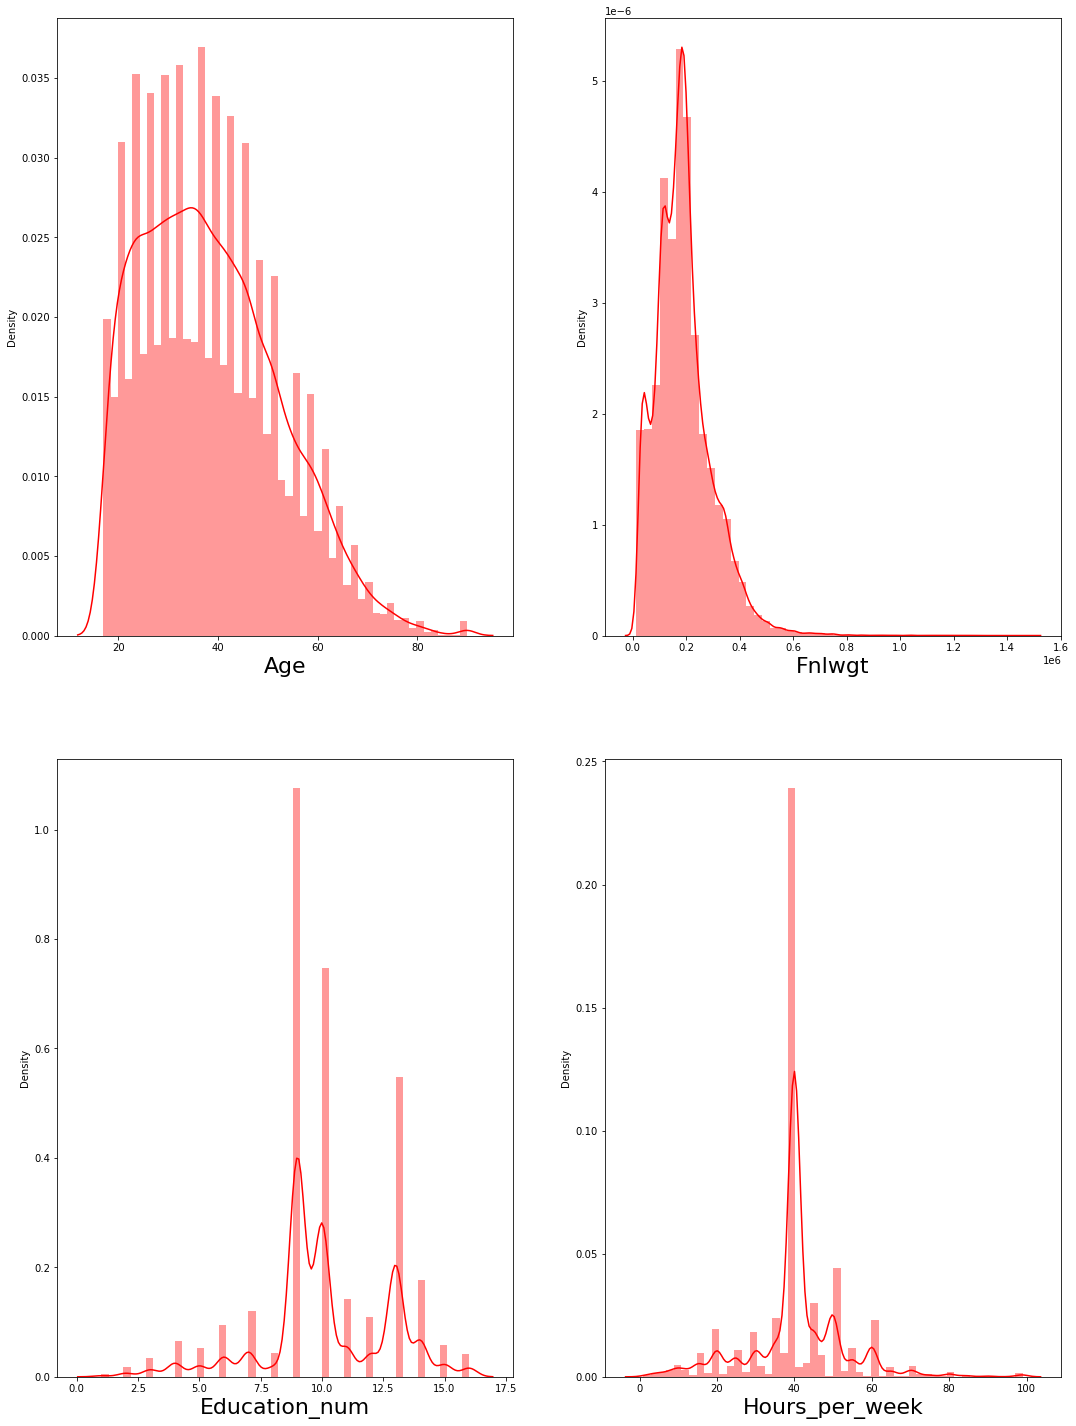

In [151]:
plt.figure(figsize=(18,25),facecolor='white')
plotnumber=1
for column in numerical_column:
    if plotnumber<=6:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()


In the above plot the age column is normal as compared to other plot but the mean is more than the median so it is skewed to right.
The data in the columns Education num and Hoursper week are not normal but they have no skewness.

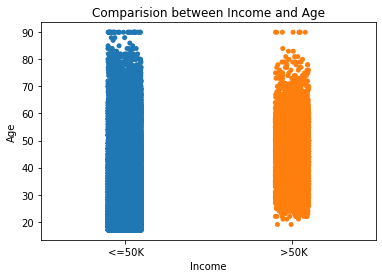

In [152]:
plt.title('Comparision between Income and Age')
sns.stripplot(x='Income',y='Age', data=df)
plt.show()

The people whose age is between 20 to 80 have annual income more than 50K.

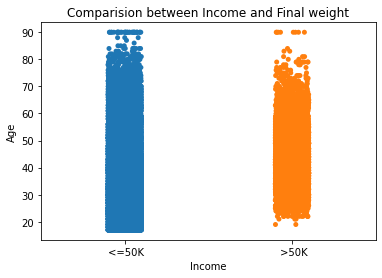

In [153]:
plt.title('Comparision between Income and Final weight')
sns.stripplot(x='Income',y='Age', data=df)
plt.show()

The above plot shows the visualization of the Final weight with income.
There is no significant relation between final weight and income of the people.

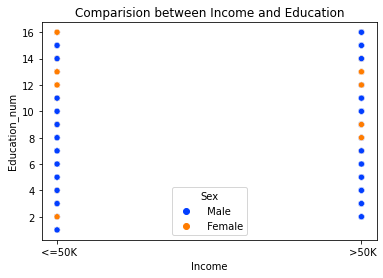

In [154]:
plt.title('Comparision between Income and Education')
sns.scatterplot(x='Income',y='Education_num', data=df,hue="Sex",palette="bright")
plt.show()


The above plot shows the visualization of education with income.
The Income is more than 50K for the people having high education number.


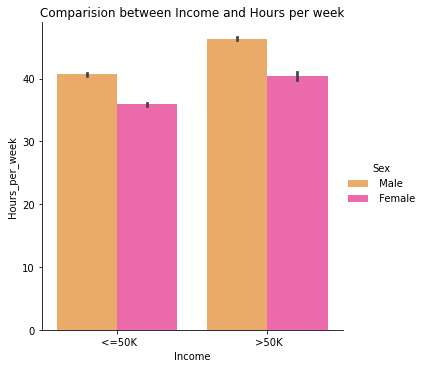

In [155]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="spring_r");
plt.title('Comparision between Income and Hours per week')
plt.show()

The above plot shows the visualization of Hours per week with income.

The income is >50K when the Hours is high for both male and female.

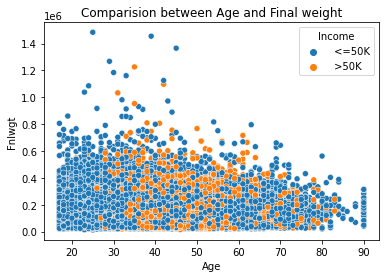

In [156]:
plt.title('Comparision between Age and Final weight')
sns.scatterplot(x='Age',y='Fnlwgt', data=df,hue="Income");
plt.show()

<Figure size 720x576 with 0 Axes>

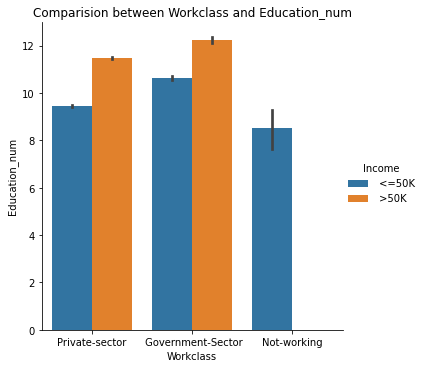

In [157]:
plt.figure(figsize=(10,8))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.show()


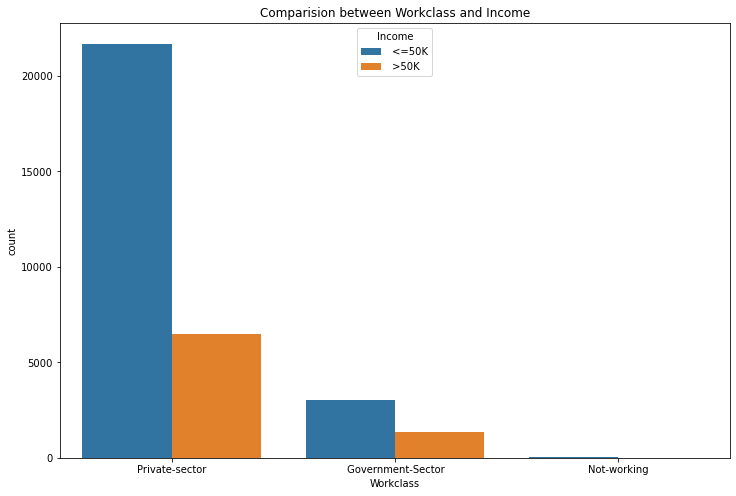

In [158]:
plt.figure(figsize=(12,8))
sns.countplot(df["Workclass"],hue=df["Income"])
plt.title("Comparision between Workclass and Income")
plt.show()

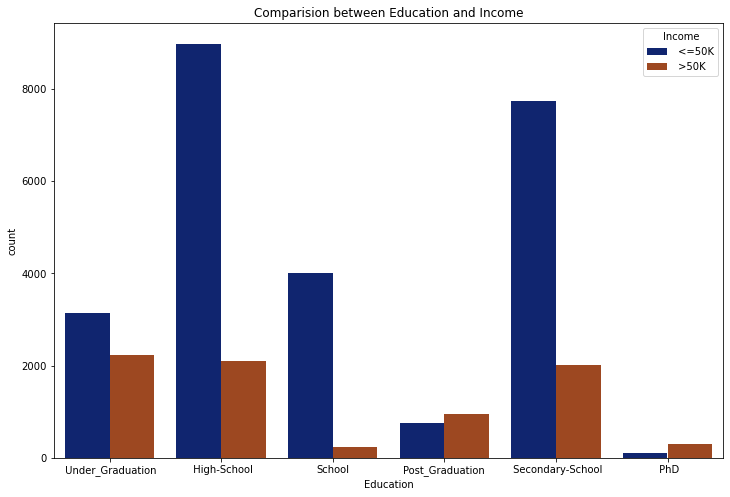

In [159]:
plt.figure(figsize=(12,8))
sns.countplot(df["Education"],hue=df["Income"],palette="dark" )
plt.title("Comparision between Education and Income")
plt.show()

<Figure size 864x576 with 0 Axes>

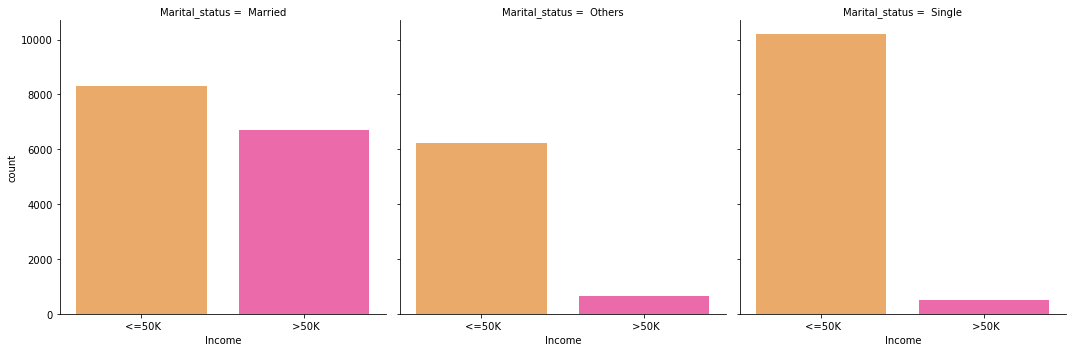

In [160]:
plt.figure(figsize=(12,8))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="spring_r")
plt.show()

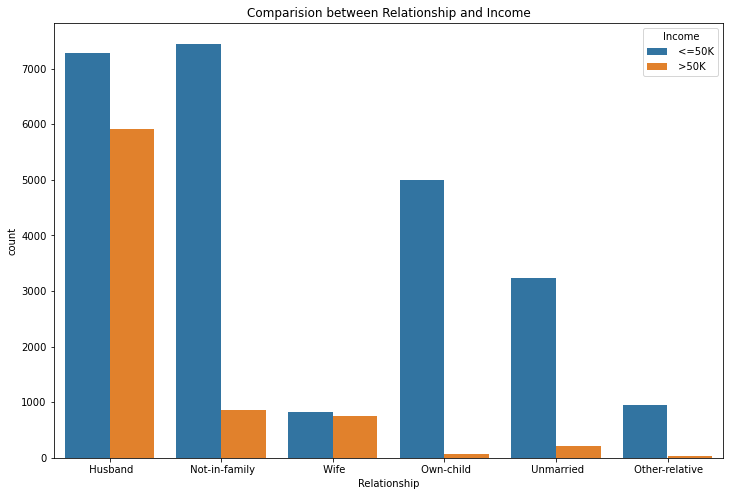

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(df["Relationship"],hue=df["Income"] )
plt.title("Comparision between Relationship and Income")
plt.show()

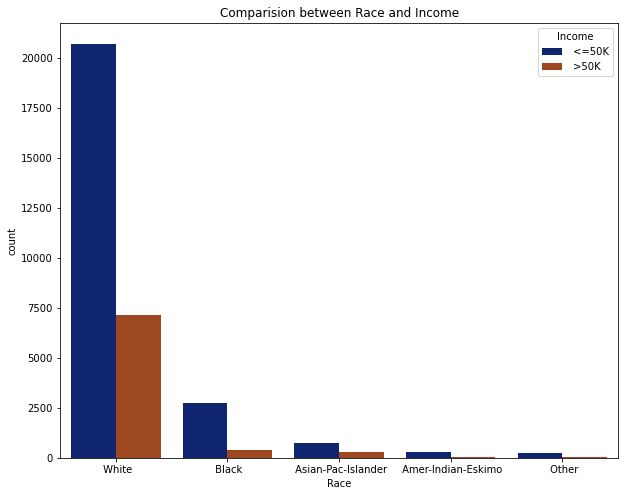

In [162]:
plt.figure(figsize=(10,8))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="dark")
plt.title("Comparision between Race and Income")
plt.show()

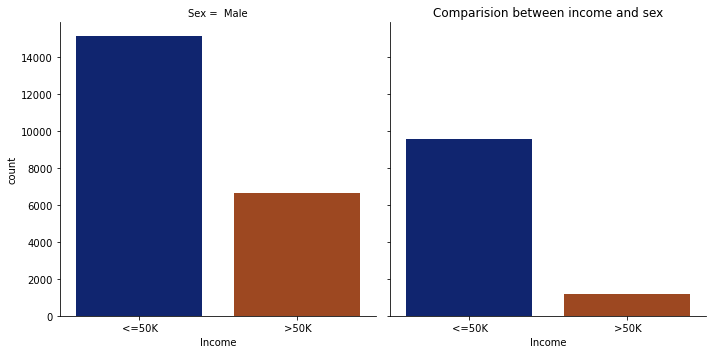

In [163]:
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="dark")
plt.title("Comparision between income and sex")
plt.show()

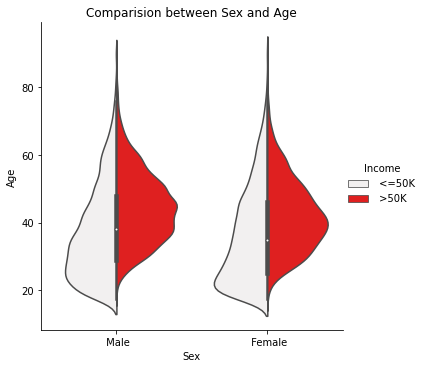

In [164]:
sns.catplot(x="Sex", y="Age", kind="violin",color="red", data=df,hue="Income",split=True)
plt.title("Comparision between Sex and Age")
plt.show()

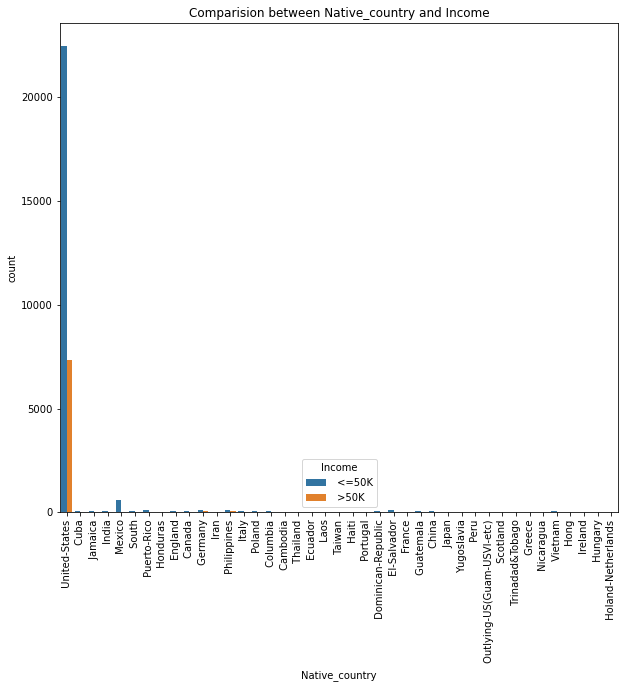

In [165]:
plt.figure(figsize=(10,9))
sns.countplot(df["Native_country"],hue=df["Income"] )
plt.title("Comparision between Native_country and Income")
plt.xticks(rotation=90)
plt.show()

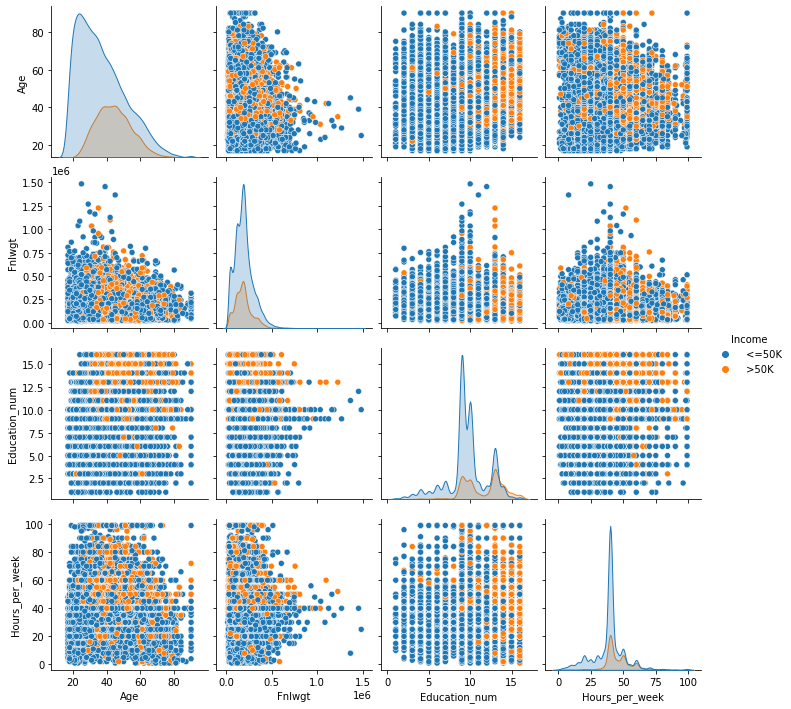

In [166]:
sns.pairplot(df,hue="Income")

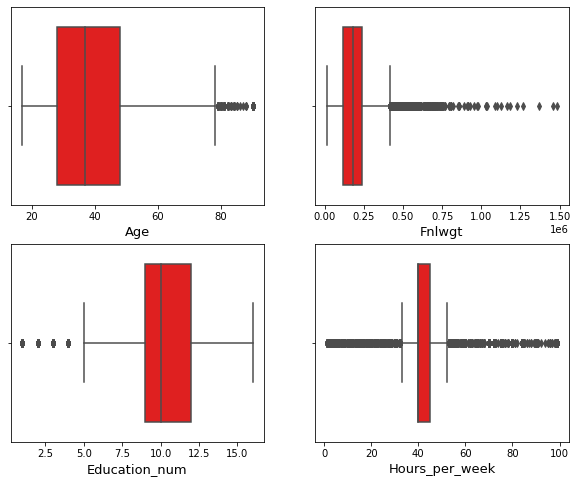

In [167]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_column:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()

In the above numerical column the outliers are present 

In [168]:
outliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]


In [169]:
from scipy.stats import zscore
zscore=np.abs(zscore(outliers))
zscore

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [170]:
new_dataframe = df[(zscore<3).all(axis=1)] 
new_dataframe

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Private-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


After removing the outliers we are getting 31461 rows and 13 columns in the new dataset

In [171]:
df.shape

(32560, 13)

This is the shape of original dataset.
Before removing the outliers we had 32560 rows and 13 columns in our dataset.

In [172]:
new_dataframe.shape

(31461, 13)

This is the shape of the new dataset.
After removing the outliers we having 31461 rows and 13 columns in our new dataset.


In [173]:
Lost_data = (32560-31461)/32560*100
Lost_data

3.3753071253071254

Through zscore method we are losing 3% of the data from our dataset

In [174]:
Q1=outliers.quantile(0.25)

Q3=outliers.quantile(0.75)

IQR=Q3-Q1

dataset=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [175]:
dataset.shape

(21950, 13)

Through IQR method the dataframe has 21950 rows and 13 columns.

In [176]:
loss_data = (32560-21950)/32560*100
loss_data

32.58599508599509

Using IQR method we are losing 32% of the data 

In [177]:
new_dataframe.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In the above method we find the skewness in the column Fnlwgt.

In [178]:
new_dataframe["Fnlwgt"] = np.cbrt(df["Fnlwgt"])

In [179]:
new_dataframe.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

In the above dataset we have removed the skewness from column Fnlwgt through cuberoot method.


In [180]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
category_column = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
new_dataframe[category_column]= new_dataframe[category_column].apply(LE.fit_transform)

In [181]:
new_dataframe[category_column]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,2,3,0,3,0,4,1,38,0
1,2,0,1,5,1,4,1,38,0
2,2,5,0,5,0,2,1,38,0
3,2,3,0,9,5,2,0,4,0
4,2,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,2,2,0,12,5,4,0,38,0
32556,2,0,0,6,0,4,1,38,1
32557,2,0,1,0,4,4,0,38,0
32558,2,0,2,0,3,4,1,38,0


In [182]:
correlation = new_dataframe.corr()
correlation

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083976,-0.062328,-0.009682,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083976,1.000000,0.021537,-0.035497,-0.160112,0.033947,0.005930,-0.001453,0.052175,0.036279,-0.004063,-0.032302,-0.061518
Fnlwgt,-0.062328,0.021537,1.000000,0.007806,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.009682,-0.035497,0.007806,1.000000,-0.052888,0.037934,0.068764,0.001954,-0.005373,0.001626,-0.053121,-0.073192,0.034278
Education_num,0.053361,-0.160112,-0.031874,-0.052888,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.033947,0.030462,0.037934,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,-0.001321,0.005930,0.001524,0.068764,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.001453,0.009060,0.001954,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.052175,-0.006959,-0.005373,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036279,0.023307,0.001626,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


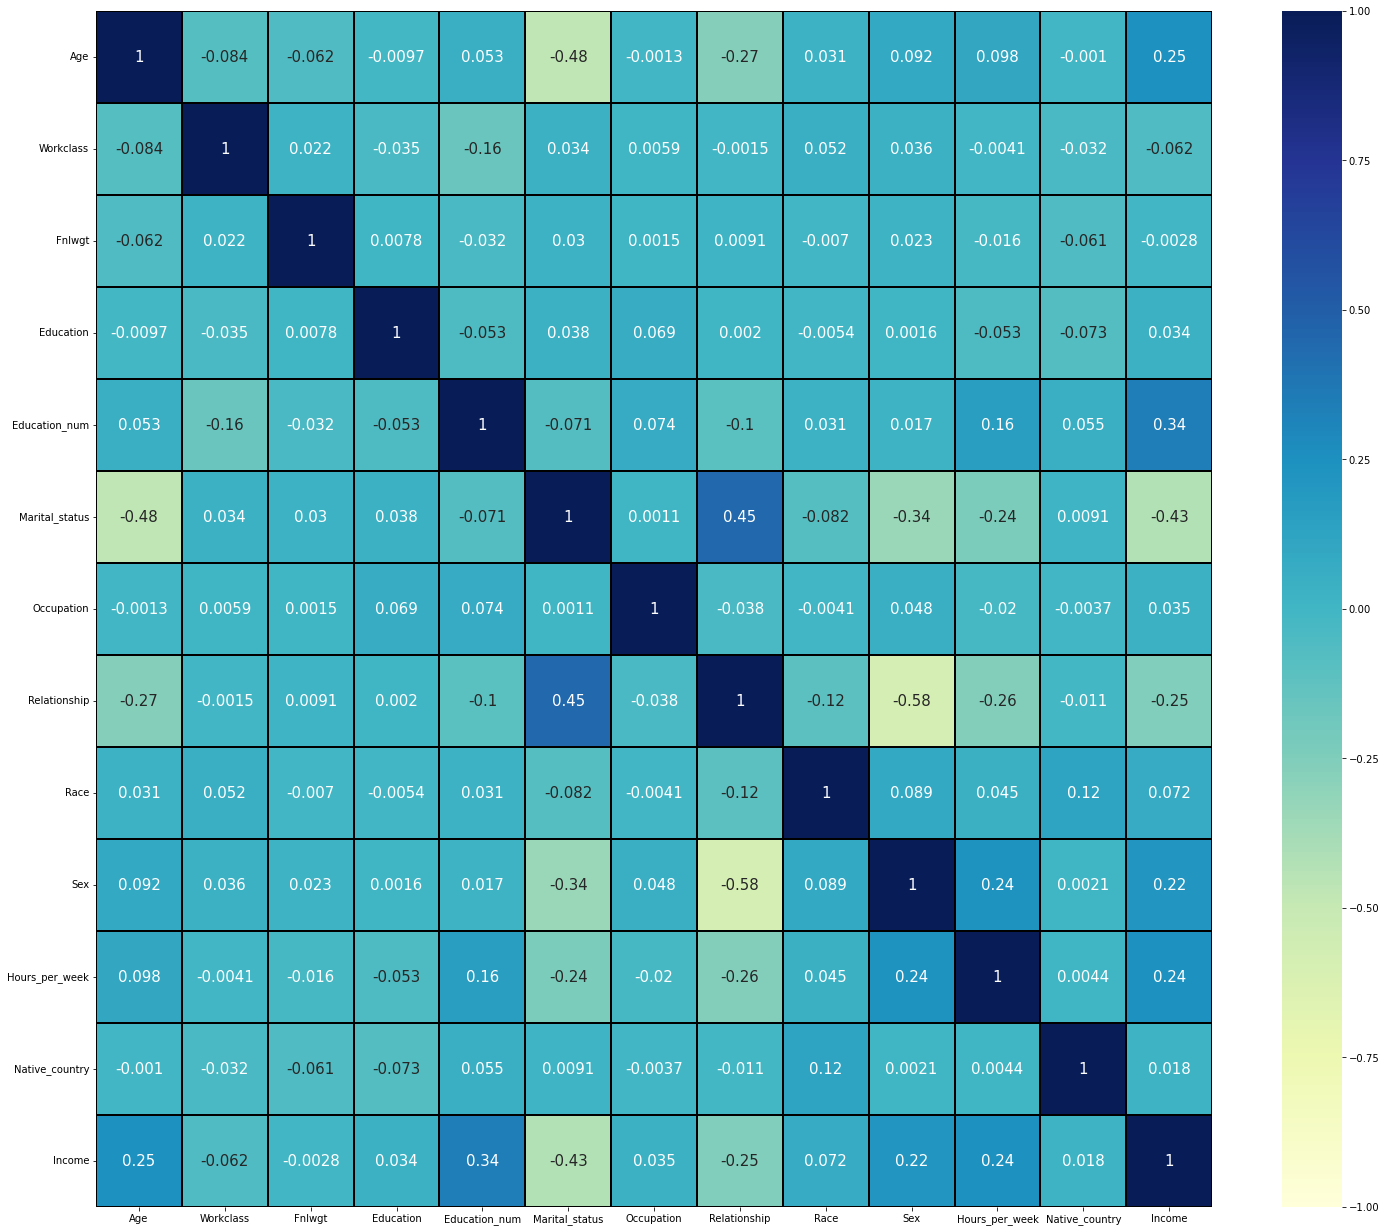

In [183]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_dataframe.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. 

The above heat map contains both positive and negative correlation.

There is not much correlation between the target and the label.

The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

The columns Marital status and Relationship have less correlation with the label.

In the data there is no multicollinearity issue present.

In [184]:
correlation['Income'].sort_values(ascending=False)


Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.061518
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

In the above data the positive and negative correlation iss present between the features and the target.

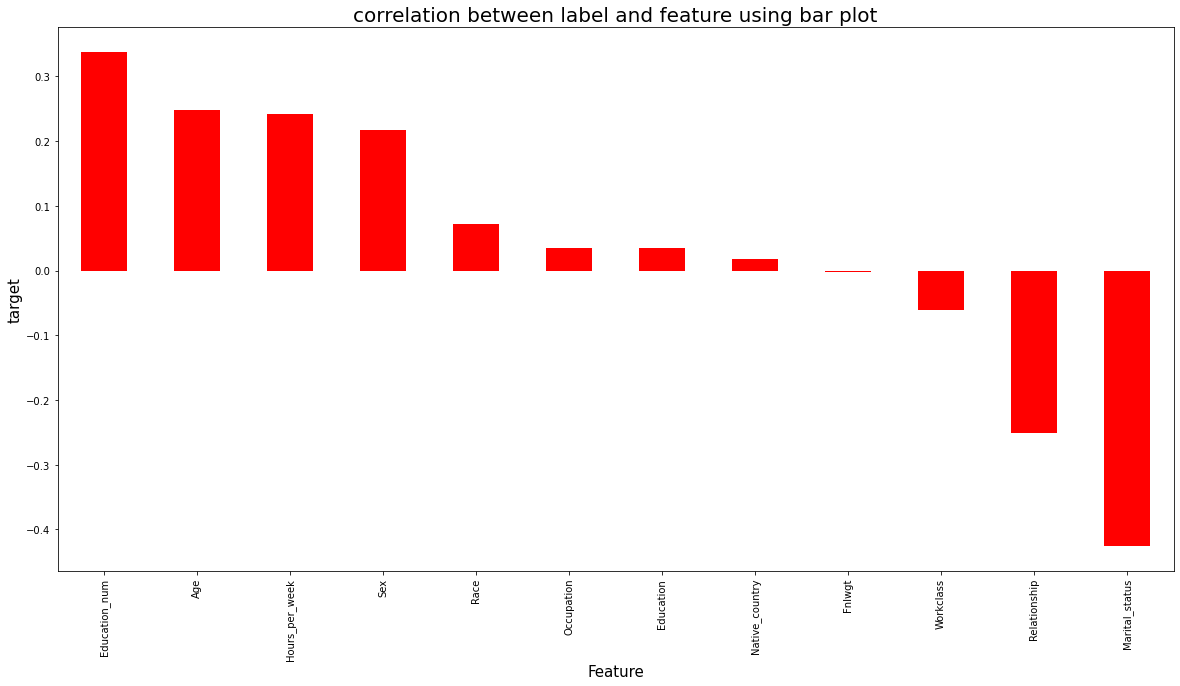

In [185]:
plt.figure(figsize=(20,10))
new_dataframe.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()



The column Fnlwgt has very less correlation with the label

In [186]:
x= new_dataframe.drop("Income", axis=1)
y= new_dataframe["Income"]

In [187]:
x.shape

(31461, 12)

In [188]:
y.shape

(31461,)

In [189]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.39632,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.39632,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.39632,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.39632,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.39632,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.39632,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.39632,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.39632,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.39632,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [190]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In the above data there is a class imbalancing issue present,so we will use SMOTE to balance the data

In [191]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x, y = sm.fit_resample(x,y)

In [192]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

After the SMOTE technique our data is balanced

In [193]:
new_dataframe.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,2,43.675121,3,13,0,3,0,4,1,13,38,0
1,38,2,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,2,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,2,69.686283,3,13,0,9,5,2,0,40,4,0
4,37,2,65.776255,4,14,0,3,5,4,0,40,38,0


In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test, preddtc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8380380100614868  on Random_state  35


The best accuracy is 83.80% on the Random state 35

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [197]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc =dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8290245947456679
[[5898 1239]
 [1208 5967]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7137
           1       0.83      0.83      0.83      7175

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



The accuracy score for Decision Tree Classifer is 82.90%.

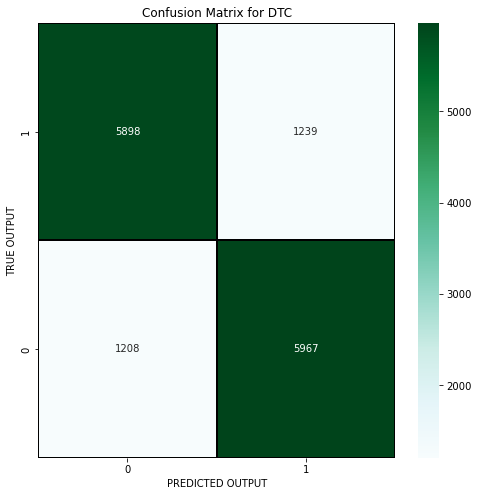

In [198]:
CM = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for DTC')
plt.show()


In [199]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8761878144214645
[[6121 1016]
 [ 756 6419]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7137
           1       0.86      0.89      0.88      7175

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312




The accuracy score for Random Forest Classifer is 87.61%.

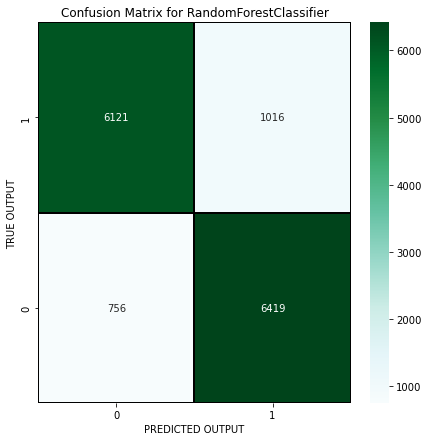

In [200]:
CM = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [201]:
lg= LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)

print(predlg)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))


[1 0 1 ... 0 0 1]
0.792272219116825
[[5350 1787]
 [1186 5989]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      7137
           1       0.77      0.83      0.80      7175

    accuracy                           0.79     14312
   macro avg       0.79      0.79      0.79     14312
weighted avg       0.79      0.79      0.79     14312



The accuracy score for Logistic Regression is 79%

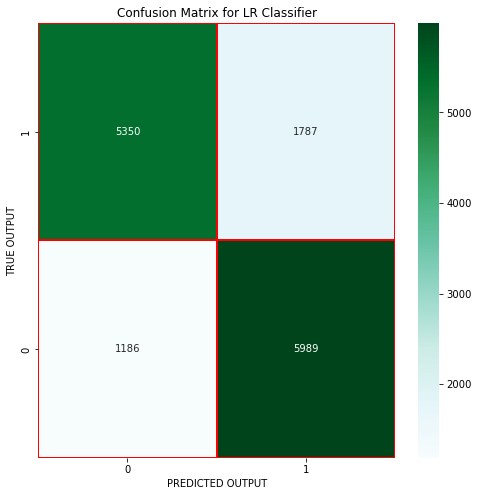

In [202]:
CM= confusion_matrix(y_test,predlg)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="red", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for LR Classifier')
plt.show()

In [203]:
knn=KNN()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))


0.8357322526551146
[[5381 1756]
 [ 595 6580]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      7137
           1       0.79      0.92      0.85      7175

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.83     14312
weighted avg       0.84      0.84      0.83     14312



The accuracy score for KNN is 83.57%

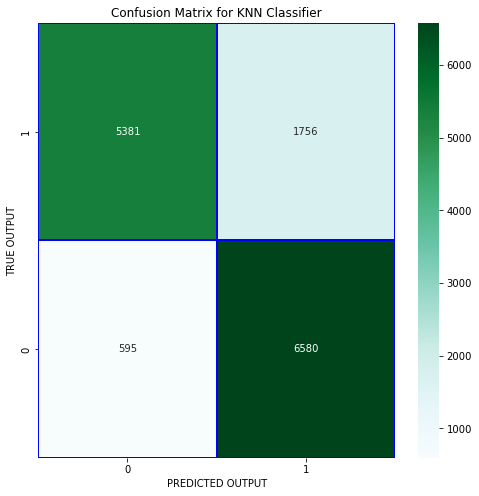

In [204]:
CM= confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [205]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB.score(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8458636109558413
[[5710 1427]
 [ 779 6396]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7137
           1       0.82      0.89      0.85      7175

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



The accuracy score for gradient boosting classifier is 84.58%

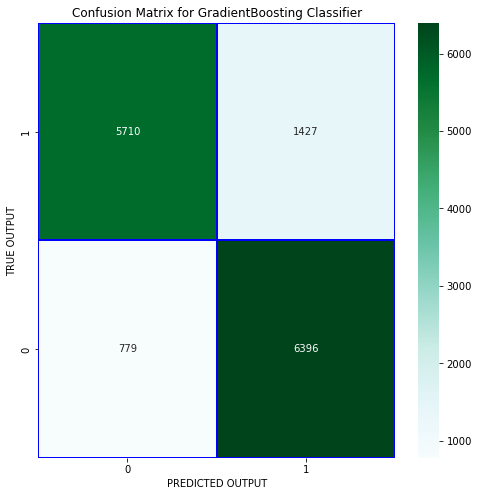

In [206]:
CM= confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show()

In [207]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8304918949133594
[[5707 1430]
 [ 996 6179]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      7137
           1       0.81      0.86      0.84      7175

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



The accuracy score for AdaBoost Classifier is 83.04%

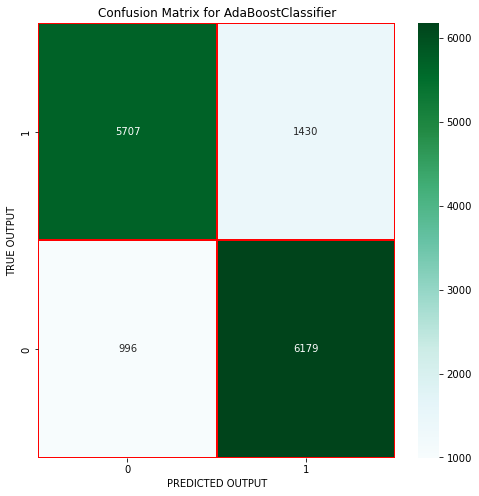

In [208]:
CM= confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="red", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

In [209]:
from sklearn.ensemble import ExtraTreesClassifier
XT=ExtraTreesClassifier()
XT.fit(x_train,y_train)
predXT=XT.predict(x_test)
print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))


0.8805897149245389
[[6107 1030]
 [ 679 6496]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7137
           1       0.86      0.91      0.88      7175

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy score for Extra Trees Classifier is 88.05%

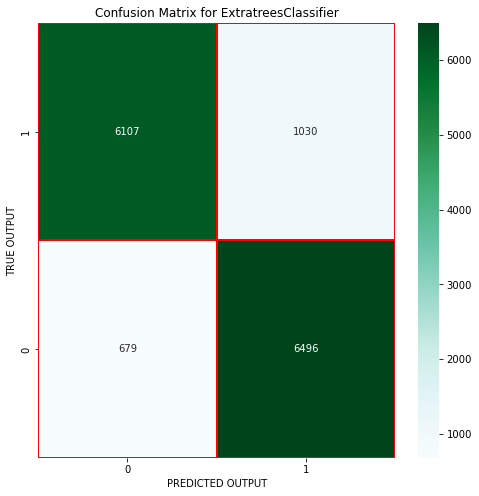

In [210]:
CM= confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="red", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for ExtratreesClassifier')
plt.show()

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
print("dtc crossvalidation score",cross_val_score(dtc,x,y,cv=5).mean())
print("RFC crossvalidation score",cross_val_score(RFC,x,y,cv=5).mean())
print("LG crossvalidationscore",cross_val_score(lg,x,y,cv=5).mean())
print("KNN crossvalidationscore",cross_val_score(knn,x,y,cv=5).mean())
print("GB crossvalidationscore",cross_val_score(GB,x,y,cv=5).mean())
print("ABC crossvalidationscore",cross_val_score(ABC,x,y,cv=5).mean())
print("XT crossvalidationscore",cross_val_score(XT,x,y,cv=5).mean())

dtc crossvalidation score 0.8329788211632436
RFC crossvalidation score 0.8812533299841909
LG crossvalidationscore 0.7960635838519814
KNN crossvalidationscore 0.8492647041216573
GB crossvalidationscore 0.8481961566394247
ABC crossvalidationscore 0.832390766797559
XT crossvalidationscore 0.8905179954416192


In the above data there are the cross validation scores for the different models.

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:
parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}

In [215]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [216]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [217]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'splitter': 'best'}

In [218]:
census_income= DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
census_income.fit(x_train, y_train)
pred=census_income.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.2168809390721


The final accuracy of the decision tree classifier model is 82.21%.

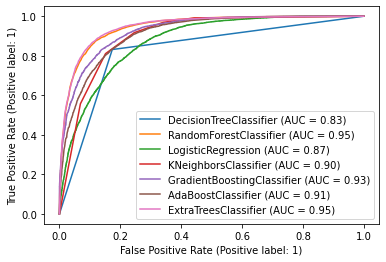

In [219]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()


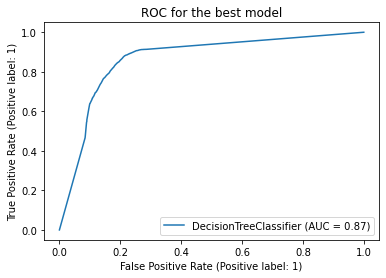

In [220]:
plot_roc_curve(census_income, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [221]:
import joblib
joblib.dump(census_income,"censusincome_Model.obj")

['censusincome_Model.obj']

In [222]:
model=joblib.load("censusincome_Model.obj")

predict = model.predict(x_test)
predict

array([1, 0, 1, ..., 0, 0, 1])